# Prelecture HW

# Question 1

In [1]:
import pandas as pd
url='https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df=pd.read_csv(url)

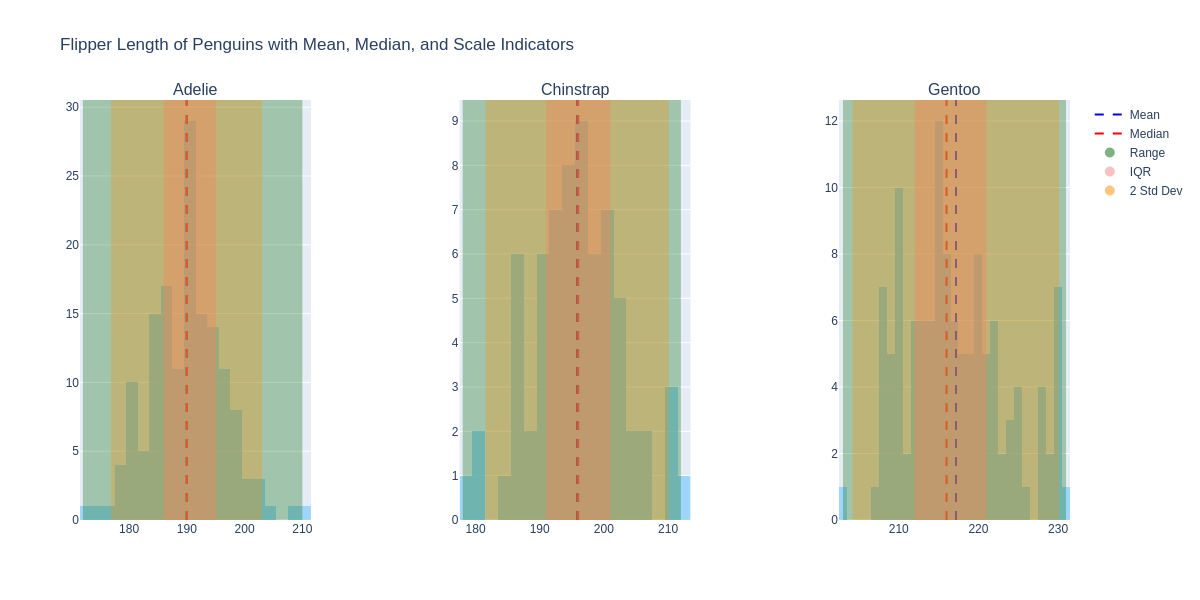

In [2]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the penguins dataset from your local path
penguins = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

# Create subplots for each species


species_list = penguins['species'].unique()
fig = make_subplots(rows=1, cols=3, subplot_titles=species_list, horizontal_spacing=0.15)

# Function to add vertical lines and rectangles
def add_lines_and_rects(fig, species_data, row, col):
    mean_value = species_data['flipper_length_mm'].mean()
    median_value = species_data['flipper_length_mm'].median()
    std_value = species_data['flipper_length_mm'].std()
    min_value = species_data['flipper_length_mm'].min()
    max_value = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    
    # Add histogram
    fig.add_trace(go.Histogram(x=species_data['flipper_length_mm'], nbinsx=30, name='Histogram', marker_color='lightskyblue', opacity=0.75, showlegend=False), row=row, col=col)
    
    # Add vertical lines (mean and median)
    fig.add_vline(x=mean_value, line_color='blue', line_dash='dash', row=row, col=col)  
    fig.add_vline(x=median_value, line_color='red', line_dash='dash', row=row, col=col)
    
    # Add vertical rectangles (range, IQR, 2 std dev)
    fig.add_vrect(x0=min_value, x1=max_value, fillcolor="darkgreen", opacity=0.3, line_width=0, row=row, col=col)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="lightcoral", opacity=0.4, line_width=0, row=row, col=col)
    fig.add_vrect(x0=mean_value-2*std_value, x1=mean_value+2*std_value, fillcolor="darkorange", opacity=0.3, line_width=0, row=row, col=col)

# Loop through each species and create the histograms and lines
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    add_lines_and_rects(fig, species_data, row=1, col=i+1)

# Manually adding the legend entries for the lines and rectangles
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='blue', dash='dash'), name='Mean'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='red', dash='dash'), name='Median'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='darkgreen', size=10, opacity=0.5), name='Range'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='lightcoral', size=10, opacity=0.5), name='IQR'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='darkorange', size=10, opacity=0.5), name='2 Std Dev'))

# Update layout
fig.update_layout(title_text="Flipper Length of Penguins with Mean, Median, and Scale Indicators", height=600, width=1200)

# Show the figure
fig.show(renderer="png")


In [3]:
# Chat summary with ChatGPT

def chat_summary():
    summary = """
    1. Penguin Dataset Visualization Request: User uploaded the penguin dataset and requested a specific visualization 
       of flipper lengths, showing the position (mean, median) and scale (range, inter-quartile range, and standard deviations) for each penguin species.
       
    2. Plot Implementation: I attempted to create the requested bar chart with vertical lines for the mean and median, 
       and shaded rectangles representing the range, IQR, and ±2 standard deviations using Plotly. There were issues with displaying the interactive chart in this environment.

    3. Alternative Solution: I offered to save the plot as a static image, but that required an additional package unavailable in this environment.

    4. Final Solution: I provided the user with the complete Python code to generate the visualization locally, 
       including instructions on how to load the dataset and modify colors. The user initially wanted to change the color scheme but later decided against it.
    """
    return summary

# Call the function to return the summary
chat_summary()

'\n    1. Penguin Dataset Visualization Request: User uploaded the penguin dataset and requested a specific visualization \n       of flipper lengths, showing the position (mean, median) and scale (range, inter-quartile range, and standard deviations) for each penguin species.\n       \n    2. Plot Implementation: I attempted to create the requested bar chart with vertical lines for the mean and median, \n       and shaded rectangles representing the range, IQR, and ±2 standard deviations using Plotly. There were issues with displaying the interactive chart in this environment.\n\n    3. Alternative Solution: I offered to save the plot as a static image, but that required an additional package unavailable in this environment.\n\n    4. Final Solution: I provided the user with the complete Python code to generate the visualization locally, \n       including instructions on how to load the dataset and modify colors. The user initially wanted to change the color scheme but later decided 

In [4]:
# link with ChatGPT:https://chatgpt.com/share/66f4acb2-7dfc-800d-9b23-f548a74d39b9

# Question 2

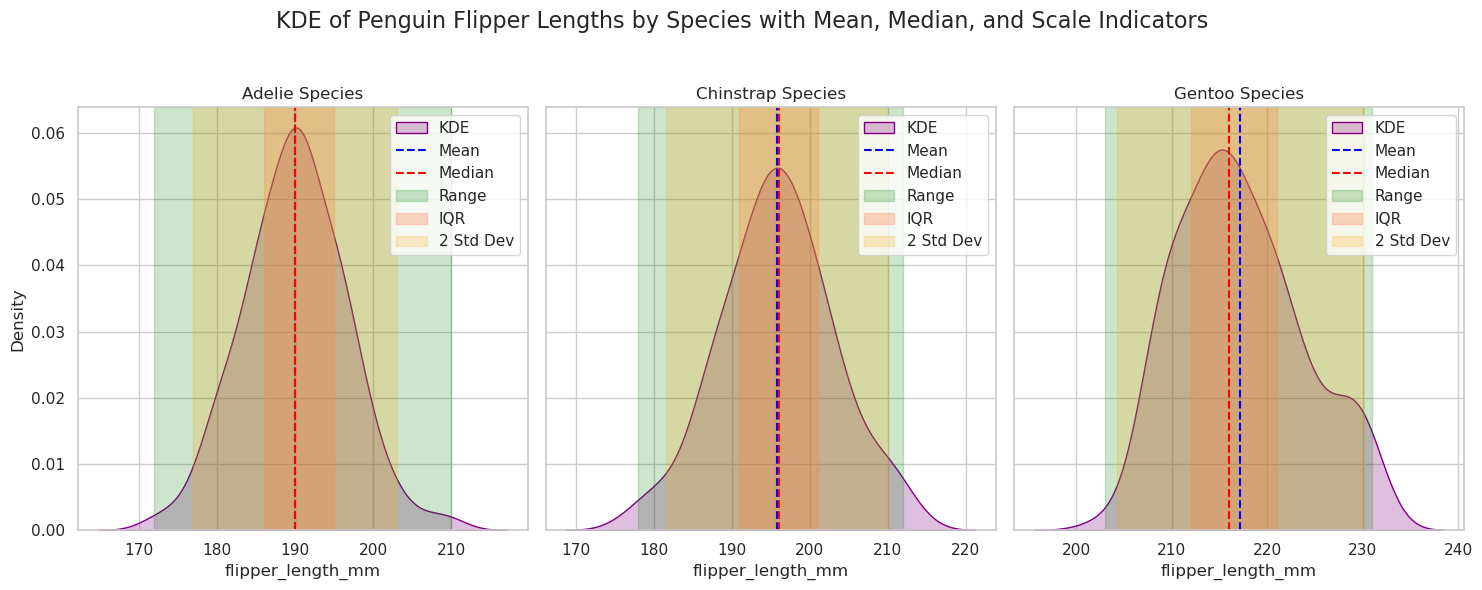

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

# Set the style
sns.set(style="whitegrid")

# Create subplots for each species
species_list = penguins['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

# Function to add KDE plot and vertical lines/rectangles
def add_kde_lines_rects(ax, species_data):
    mean_value = species_data['flipper_length_mm'].mean()
    median_value = species_data['flipper_length_mm'].median()
    std_value = species_data['flipper_length_mm'].std()
    min_value = species_data['flipper_length_mm'].min()
    max_value = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    
    # Add KDE curve
    sns.kdeplot(species_data['flipper_length_mm'], ax=ax, fill=True, color="purple", label="KDE")
    
    # Add vertical lines (mean and median)
    ax.axvline(mean_value, color='blue', linestyle='--', label='Mean')
    ax.axvline(median_value, color='red', linestyle='--', label='Median')

    # Add vertical rectangles (range, IQR, 2 std dev)
    ax.axvspan(min_value, max_value, alpha=0.2, color='green', label='Range')
    ax.axvspan(q1, q3, alpha=0.3, color='coral', label='IQR')
    ax.axvspan(mean_value-2*std_value, mean_value+2*std_value, alpha=0.2, color='orange', label='2 Std Dev')

# Loop through each species and create the KDE plots and lines
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    add_kde_lines_rects(axes[i], species_data)
    axes[i].set_title(f'{species} Species')
    axes[i].legend()

# Adjust layout
fig.suptitle("KDE of Penguin Flipper Lengths by Species with Mean, Median, and Scale Indicators", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
fig.show()


In [6]:
# Chat summary with ChatGPT

def chat_summary():
    summary = """
    1. Initial Task: You provided code that visualized histograms for each penguin species’ flipper length using Plotly, 
       with vertical lines (mean, median) and rectangles (range, IQR, 2 standard deviations). You wanted to explore 
       converting the histograms into Kernel Density Estimation (KDE) curves.

    2. First Approach: I suggested modifying your Plotly code to use scipy.stats.gaussian_kde for generating KDE 
       curves instead of histograms, while keeping the vertical lines and rectangles for statistical indicators.

    3. Switch to Seaborn: You then requested to use Seaborn for the KDE visualization. I converted the Plotly-based 
       code to Seaborn, replacing the histograms with KDE curves using sns.kdeplot.

    4. Final Seaborn Code: The provided Seaborn code generates subplots for each penguin species, creating KDE plots 
       with vertical lines for the mean and median, and shaded regions for the range, IQR, and 2 standard deviations. 
       The layout and styling were adjusted to match your requirements.
    """
    return summary

# Print the summary
print(chat_summary())



    1. Initial Task: You provided code that visualized histograms for each penguin species’ flipper length using Plotly, 
       with vertical lines (mean, median) and rectangles (range, IQR, 2 standard deviations). You wanted to explore 
       converting the histograms into Kernel Density Estimation (KDE) curves.

    2. First Approach: I suggested modifying your Plotly code to use scipy.stats.gaussian_kde for generating KDE 
       curves instead of histograms, while keeping the vertical lines and rectangles for statistical indicators.

    3. Switch to Seaborn: You then requested to use Seaborn for the KDE visualization. I converted the Plotly-based 
       code to Seaborn, replacing the histograms with KDE curves using sns.kdeplot.

    4. Final Seaborn Code: The provided Seaborn code generates subplots for each penguin species, creating KDE plots 
       with vertical lines for the mean and median, and shaded regions for the range, IQR, and 2 standard deviations. 
       The lay

In [7]:
# link with ChatGPT:https://chatgpt.com/share/66f4e55c-80a8-800d-a788-e6736ee4b9b1

# Question 3

In [8]:
# Advantages and Disadvantages provided by Chatbot
# Box Plot: Great for summarizing data quickly and spotting outliers, but doesn't show the full distribution.
# Histogram: Ideal for frequency distribution but sensitive to binning choices.
# KDE: Provides smooth, continuous representations but requires careful tuning of smoothing parameters.

In [9]:
# Personal preference
# I prefer Kernel Density Estimate (KDE) because it is visually appealing and intuitive. I can quickly grasp the shape of the distribution and the central tendency of a dataset.

In [10]:
# Chat summary with ChatGPT

def summarize_visualization_discussion():
    """
    This function provides a summary of the discussion on Box Plot, Histogram, and KDE.
    It includes key points, validations, and pros and cons of each visualization method.
    """
    
    # User's interpretations of data visualization techniques
    user_interpretations = {
        "Box Plot": "Shows the general range of the data and the degree of dispersion.",
        "Histogram": "Displays the centralized trend of the data across different intervals, but depends on interval size.",
        "KDE": "Smooths out concentrated trends in the data and is less dependent on interval size than histograms."
    }

    # Validations of interpretations (from assistant)
    validation = {
        "Box Plot": "Correct, it shows data range, quartiles, and outliers effectively.",
        "Histogram": "Accurate, but results can vary based on bin width choice.",
        "KDE": "Correct, it smooths the data distribution and is less sensitive to interval choices."
    }

    # Pros and cons of each visualization technique
    pros_cons = {
        "Box Plot": {
            "Pros": [
                "Compact summary of data spread and outliers",
                "Good for comparing distributions",
                "No need for binning choices"
            ],
            "Cons": [
                "Does not show detailed distribution within quartiles",
                "Not always intuitive for interpretation",
                "No frequency information"
            ]
        },
        "Histogram": {
            "Pros": [
                "Displays frequency of data in intervals",
                "Easy to interpret",
                "Effective for large datasets"
            ],
            "Cons": [
                "Depends heavily on bin size for accuracy",
                "Blocky and does not show smooth trends",
                "Not ideal for comparing multiple distributions"
            ]
        },
        "KDE": {
            "Pros": [
                "Smooths data distribution and provides clear trends",
                "Less sensitive to bin width compared to histograms",
                "Useful even with small datasets"
            ],
            "Cons": [
                "Smoothing parameter (bandwidth) affects accuracy",
                "Less intuitive compared to histograms",
                "May hide multimodal distributions or complex shapes"
            ]
        }
    }

    return {
        "User Interpretations": user_interpretations,
        "Validation": validation,
        "Pros and Cons": pros_cons
    }

# Running the summary function to return the chat summary in structured format
summary = summarize_visualization_discussion()
print(summary)


{'User Interpretations': {'Box Plot': 'Shows the general range of the data and the degree of dispersion.', 'Histogram': 'Displays the centralized trend of the data across different intervals, but depends on interval size.', 'KDE': 'Smooths out concentrated trends in the data and is less dependent on interval size than histograms.'}, 'Validation': {'Box Plot': 'Correct, it shows data range, quartiles, and outliers effectively.', 'Histogram': 'Accurate, but results can vary based on bin width choice.', 'KDE': 'Correct, it smooths the data distribution and is less sensitive to interval choices.'}, 'Pros and Cons': {'Box Plot': {'Pros': ['Compact summary of data spread and outliers', 'Good for comparing distributions', 'No need for binning choices'], 'Cons': ['Does not show detailed distribution within quartiles', 'Not always intuitive for interpretation', 'No frequency information']}, 'Histogram': {'Pros': ['Displays frequency of data in intervals', 'Easy to interpret', 'Effective for lar

In [11]:
# link with ChatGPT:https:https://chatgpt.com/share/66f5070f-e718-800d-8a98-2043e65adf64

# Question 4

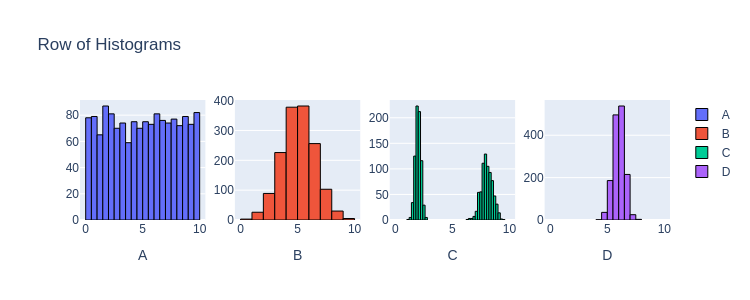

In [12]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [13]:
# similar means and similar variances: A and C
# similar means but quite different variances: A and B
# similar variances but quite different means: B and D
# quite different means and quite different variances: A and D

In [14]:
# Chat summary with ChatGPT

summary = """
1. Sample Mean, Variance, and Standard Deviation:
   - Sample Mean: The average of the values in a sample.
   - Sample Variance: A measure of how much the data points deviate from the sample mean, calculated using n - 1 (degrees of freedom).
   - Sample Standard Deviation: The square root of the variance, providing the spread of data in the same units as the data.

2. Explanation of Code Snippets:
   - np.mean(df.col) or df.col.mean(): Computes the sample mean of the column 'col'.
   - np.std(df.col, ddof=1) or df.col.std(ddof=1): Computes the sample standard deviation of the column 'col' with degrees of freedom (ddof=1).
   - np.var(df.col, ddof=1) or df.col.var(ddof=1): Computes the sample variance of the column 'col' with degrees of freedom (ddof=1).

3. Combining Columns and Calculating Statistics:
   - You can select certain columns, combine them (by summing, averaging, or concatenating), and then compute the mean, variance, and standard deviation on the combined data.
   - Example Python code was provided to show how to select and combine columns, and then calculate the sample mean, variance, and standard deviation.
"""

print(summary)



1. Sample Mean, Variance, and Standard Deviation:
   - Sample Mean: The average of the values in a sample.
   - Sample Variance: A measure of how much the data points deviate from the sample mean, calculated using n - 1 (degrees of freedom).
   - Sample Standard Deviation: The square root of the variance, providing the spread of data in the same units as the data.

2. Explanation of Code Snippets:
   - np.mean(df.col) or df.col.mean(): Computes the sample mean of the column 'col'.
   - np.std(df.col, ddof=1) or df.col.std(ddof=1): Computes the sample standard deviation of the column 'col' with degrees of freedom (ddof=1).
   - np.var(df.col, ddof=1) or df.col.var(ddof=1): Computes the sample variance of the column 'col' with degrees of freedom (ddof=1).

3. Combining Columns and Calculating Statistics:
   - You can select certain columns, combine them (by summing, averaging, or concatenating), and then compute the mean, variance, and standard deviation on the combined data.
   - Examp

In [15]:
# link with ChatGPT:https://chatgpt.com/share/66f56d37-7244-800d-9229-3aad14243bf7

# Post_lecture HW

# Question 5

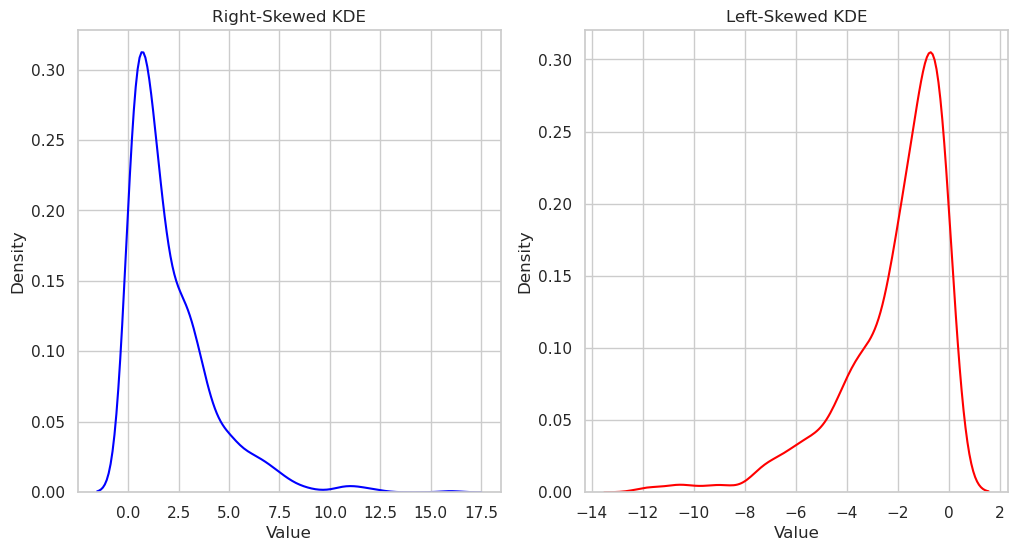

In [16]:
# Generating the right and left skewed data again since it was reset
right_skewed_data_kde = np.random.exponential(scale=2, size=1000)  # Right-skewed data
left_skewed_data_kde = -np.random.exponential(scale=2, size=1000)  # Left-skewed data (negated)

# Plot the most common example of skewness using Kernel Density Estimation (KDE)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Right-skewed KDE plot
sns.kdeplot(right_skewed_data_kde, ax=ax1, color='blue')
ax1.set_title('Right-Skewed KDE')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.grid(True)

# Left-skewed KDE plot
sns.kdeplot(left_skewed_data_kde, ax=ax2, color='red')
ax2.set_title('Left-Skewed KDE')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.grid(True)

# Show both KDE plots
plt.show()


In [17]:
# Left skewness
# Left skewness refers to a distribution where, compared to a normal distribution, larger values have a higher frequency. In simpler terms, the majority of the data consists of larger values. Additionally, for left skewness, the mean is typically less than the median.
# Right skewness
# Right skewness refers to a distribution where, compared to a normal distribution, smaller values have a higher frequency. In simpler terms, the majority of the data consists of smaller values. Additionally, for right skewness, the mean is typically greater than the median.


In [18]:
# Reasons
# From the graph, we can see that for left skewness, most of the data points are relatively large, while only a small portion of the values are smaller. However, these smaller values pull down the overall mean, making it less than the median. For right skewness, most of the data points are relatively small, with only a few large values. These few large values raise the overall mean, making it greater than the median.

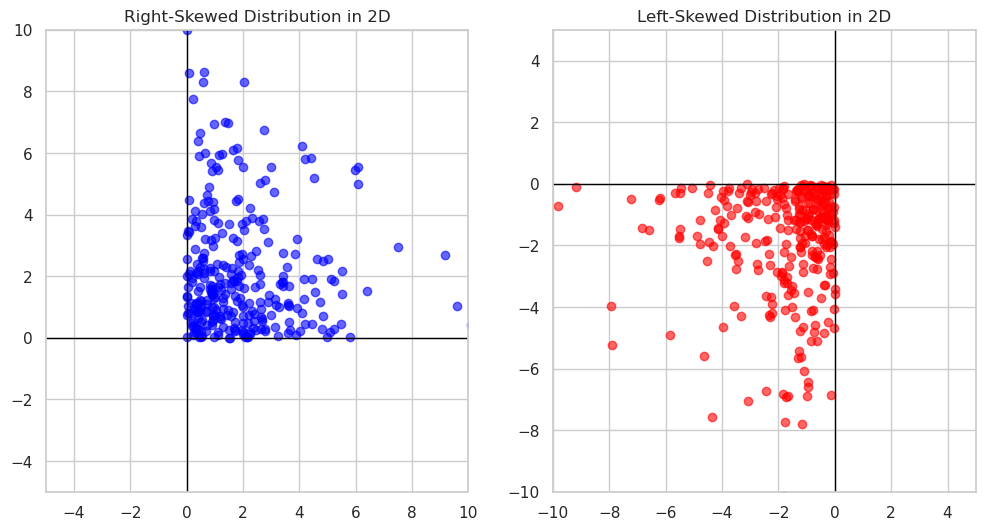

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Generate right-skewed data
right_skewed_x = np.random.exponential(scale=2, size=300)  # More data towards smaller x, tail on the right
right_skewed_y = np.random.exponential(scale=2, size=300)  # Same for y

# Generate left-skewed data (negating exponential to create left skew)
left_skewed_x = -np.random.exponential(scale=2, size=300)  # Tail on the left
left_skewed_y = -np.random.exponential(scale=2, size=300)  # Same for y

# Plot both sets of data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Right-skewed plot
ax1.scatter(right_skewed_x, right_skewed_y, color='blue', alpha=0.6, label='Right-Skewed')
ax1.set_title('Right-Skewed Distribution in 2D')
ax1.axhline(0, color='black', linewidth=1)
ax1.axvline(0, color='black', linewidth=1)
ax1.grid(True)
ax1.set_xlim([-5, 10])
ax1.set_ylim([-5, 10])

# Left-skewed plot
ax2.scatter(left_skewed_x, left_skewed_y, color='red', alpha=0.6, label='Left-Skewed')
ax2.set_title('Left-Skewed Distribution in 2D')
ax2.axhline(0, color='black', linewidth=1)
ax2.axvline(0, color='black', linewidth=1)
ax2.grid(True)
ax2.set_xlim([-10, 5])
ax2.set_ylim([-10, 5])

# Show the plot
plt.show()

In [20]:
# The following code first imports some libraries that provide statistical tools. Then, it uses the gamma function to generate a sample from a Gamma distribution.
# The generated sample1 is an object of the Gamma distribution, where a=2 and scale=2 refer to the shape parameter and scale parameter, respectively. rvs(size=1000) generates 1,000 sample values. In the Gamma function, when a is small, the distribution exhibits right skewness. As a increases, the data becomes more concentrated around the mean, resulting in a more symmetrical distribution. When scale is larger, the generated sample values are more spread out, whereas with a smaller scale, the distribution is more concentrated. The values in the Gamma function are non-negative.
# Then, sample1 is displayed as a histogram. The mean and median values of sample1 are calculated. After that, sample2 is generated. Due to the negative sign -stats.gamma, the generated Gamma values are all negative. The skewness of the Gamma distribution is also reversed, changing from right skewness to left skewness.

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

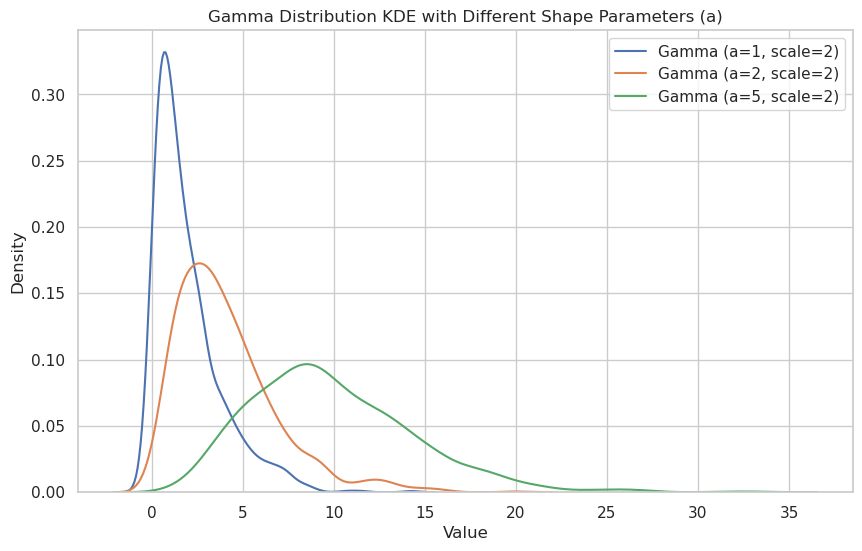

In [36]:
# gamma distribution with different values of a
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define the shape parameters for the Gamma distribution
shape_params = [1, 2, 5]  # Different shape parameters
scale_param = 2  # Keeping scale parameter constant

# Create a plot for Gamma distributions with different 'a' (shape) values
plt.figure(figsize=(10, 6))

# Loop over different shape parameters and plot the KDE for each
for a in shape_params:
    data = gamma(a=a, scale=scale_param).rvs(size=1000)  # Generate data
    sns.kdeplot(data, label=f'Gamma (a={a}, scale={scale_param})')

# Add title, labels, and legend
plt.title('Gamma Distribution KDE with Different Shape Parameters (a)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [37]:
# Chat summary with ChatGPT

def chat_summary():
    summary = """
    1. Mean and Median in Skewed Distributions:
       - In a right-skewed distribution, the mean is greater than the median because extreme large values pull the mean to the right.
       - In a left-skewed distribution, the mean is less than the median because extreme small values pull the mean to the left.
       - A dataset with larger positive numbers and smaller positive numbers may not be left-skewed unless there's a long tail toward smaller or negative values.
       
    2. Gamma Distribution:
       - The Gamma distribution is defined by a shape parameter (a) and a scale parameter (theta).
         - The shape parameter controls the skewness and form of the distribution.
         - The scale parameter controls the spread of the distribution.
       - The Gamma distribution is always right-skewed due to its non-negative support and exponential decay.
    
    3. Left-Skewness and Negating Gamma:
       - The Gamma distribution cannot naturally be left-skewed, but you can create a left-skewed distribution by negating the values generated from a Gamma distribution.
       
    4. Visualizations:
       - We visualized histograms and KDE plots for right-skewed and left-skewed distributions.
       - We compared Gamma distributions with different shape parameters (a) to show varying degrees of skewness.
       - A histogram for the Exponential distribution (Gamma with a=1) was generated to clarify its shape.
    
    5. Code Issues:
       - We resolved issues related to plotting KDE curves for Gamma distributions, re-importing libraries, and ensuring all variables were properly defined.
    """
    print(summary)

# Call the function to display the summary
chat_summary()



    1. Mean and Median in Skewed Distributions:
       - In a right-skewed distribution, the mean is greater than the median because extreme large values pull the mean to the right.
       - In a left-skewed distribution, the mean is less than the median because extreme small values pull the mean to the left.
       - A dataset with larger positive numbers and smaller positive numbers may not be left-skewed unless there's a long tail toward smaller or negative values.
       
    2. Gamma Distribution:
       - The Gamma distribution is defined by a shape parameter (a) and a scale parameter (theta).
         - The shape parameter controls the skewness and form of the distribution.
         - The scale parameter controls the spread of the distribution.
       - The Gamma distribution is always right-skewed due to its non-negative support and exponential decay.
    
    3. Left-Skewness and Negating Gamma:
       - The Gamma distribution cannot naturally be left-skewed, but you can crea

In [ ]:
# Chat link with ChatGPT:https://chatgpt.com/share/66f5c0db-d6b8-800d-9cc5-74862d270301

# Question 6

In [23]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/ufo_mod.csv")
df # df.columns

,city,state,country,report,latitude,longitude,date,year,month,day,decade,norm_population
0,san marcos,tx,us,4/27/2004,29.883056,-97.941111,1949-10-10,1949,10,10,1940,1.558889e-07
1,edna,tx,us,1/17/2004,28.978333,-96.645833,1956-10-10,1956,10,10,1950,1.296816e-07
2,kaneohe,hi,us,1/22/2004,21.418056,-157.803611,1960-10-10,1960,10,10,1960,1.580348e-06
3,bristol,tn,us,4/27/2007,36.595000,-82.188889,1961-10-10,1961,10,10,1960,2.803406e-07
4,norwalk,ct,us,10/2/1999,41.117500,-73.408333,1965-10-10,1965,10,10,1960,3.944409e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
65109,nashville,tn,us,9/30/2013,36.165833,-86.784444,2013-09-09,2013,9,9,2010,1.575770e-07
65110,boise,id,us,9/30/2013,43.613611,-116.202500,2013-09-09,2013,9,9,2010,6.379252e-07
65111,napa,ca,us,9/30/2013,38.297222,-122.284444,2013-09-09,2013,9,9,2010,2.684279e-08
65112,vienna,va,us,9/30/2013,38.901111,-77.265556,2013-09-09,2013,9,9,2010,1.249840e-07


In [24]:
# checking missing value
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/ufo_mod.csv")
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

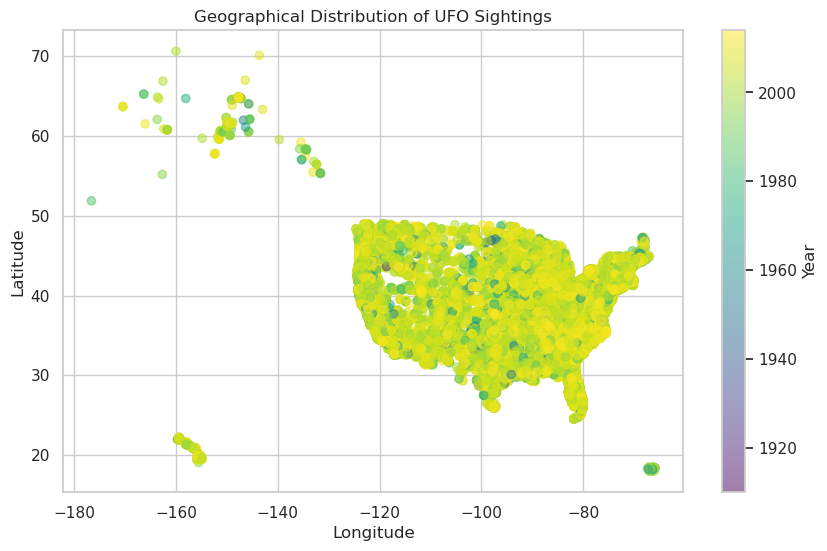

In [27]:
# Visualizing geographical distribution of UFO sightings
def plot_geographical_distribution(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['longitude'], data['latitude'], alpha=0.5, c=data['year'], cmap='viridis')
    plt.colorbar(label='Year')
    plt.title('Geographical Distribution of UFO Sightings')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

plot_geographical_distribution(ufo_data)

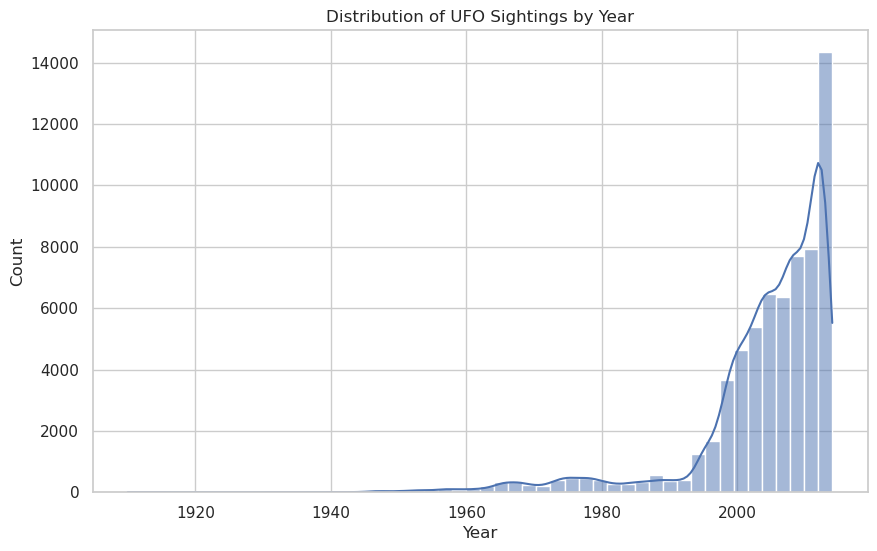

In [28]:
# Distribution of sightings per year
def plot_sightings_by_year(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['year'], bins=50, kde=True)
    plt.title('Distribution of UFO Sightings by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.show()

plot_sightings_by_year(ufo_data)

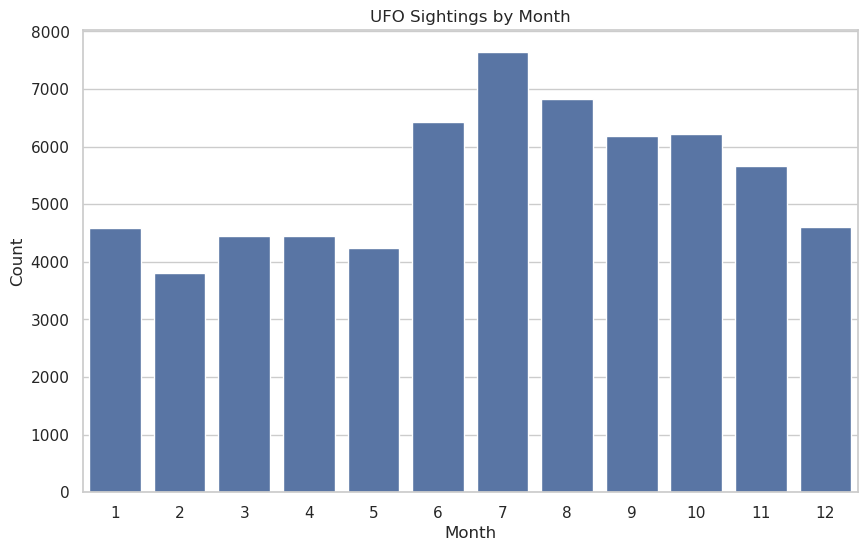

In [35]:
# Analyze sightings by month
def plot_sightings_by_month(data):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='month', data=data)
    plt.title('UFO Sightings by Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.show()

plot_sightings_by_month(ufo_data)

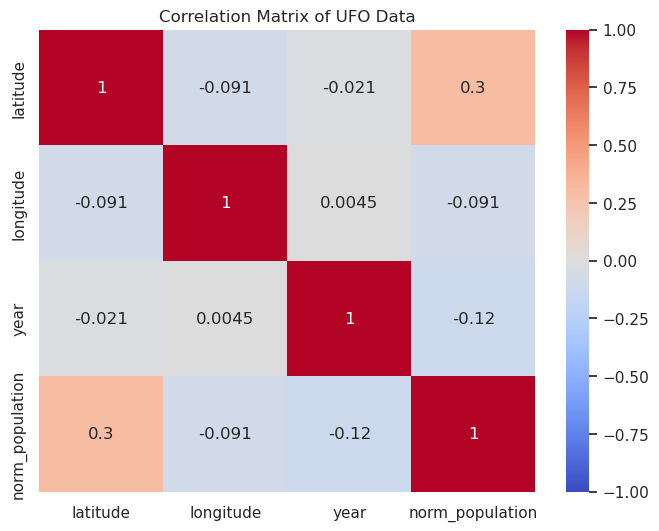

In [30]:
# Correlation between numerical features
def plot_correlation_matrix(data):
    plt.figure(figsize=(8, 6))
    correlation_matrix = data[['latitude', 'longitude', 'year', 'norm_population']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of UFO Data')
    plt.show()

plot_correlation_matrix(ufo_data)

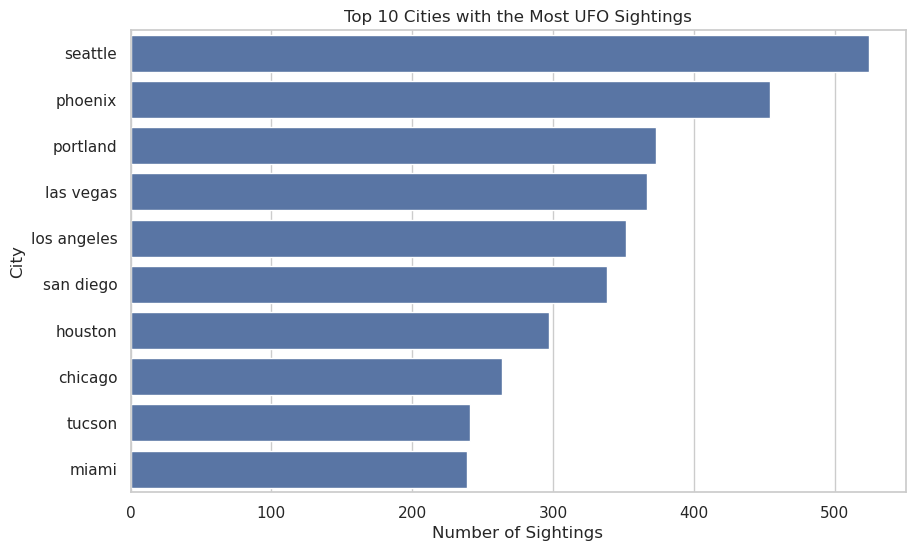

In [32]:
# Top 10 cities with the most sightings
def top_cities(data, top_n=10):
    top_cities = data['city'].value_counts().head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_cities.values, y=top_cities.index)
    plt.title(f'Top {top_n} Cities with the Most UFO Sightings')
    plt.xlabel('Number of Sightings')
    plt.ylabel('City')
    plt.show()

top_cities(ufo_data)


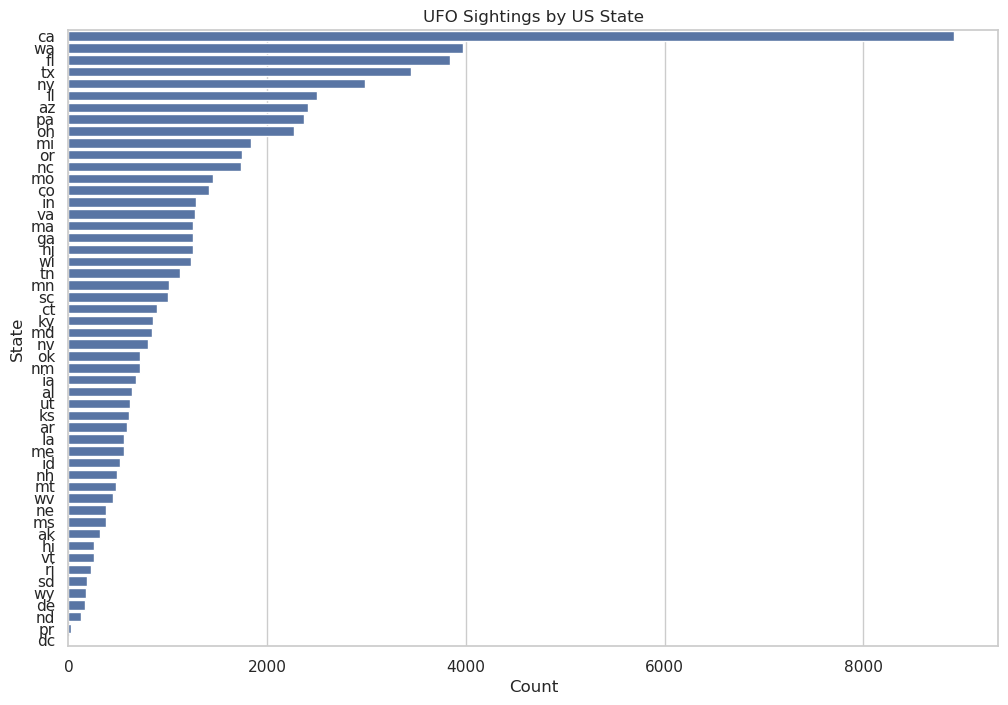

In [34]:
# Analyze sightings by state (for US)
def plot_sightings_by_state(data):
    plt.figure(figsize=(12, 8))
    sns.countplot(y='state', data=data[data['country'] == 'us'], order=data['state'].value_counts().index)
    plt.title('UFO Sightings by US State')
    plt.xlabel('Count')
    plt.ylabel('State')
    plt.show()

plot_sightings_by_state(ufo_data)

In [ ]:
# interesting aspects of this data
# Compare UFO sightings between the US and other countries in the dataset. The US often has more reported sightings, but it might be fun to explore where else these reports are happening globally.
# Most sightings might occur late at night, possibly aligning with certain astronomical phenomena (like meteor showers) being mistaken for UFOs.
# Certain states (like California or Texas) might have a significantly higher number of reports compared to others.
# Sightings might be more frequent during summer months when people spend more time outdoors at night, or during holidays when there's more human activity.

In [23]:
# Chat summary with ChatGPT

def chat_summary():
    # Dataset Overview
    dataset_description = """
    The dataset contains UFO sightings data with the following columns:
    - city: The city of the sighting.
    - state: The state where the sighting occurred.
    - country: The country of the sighting.
    - report: Date of the report.
    - latitude: Latitude of the location.
    - longitude: Longitude of the location.
    - date: Original date of the sighting.
    - year: Year of the sighting.
    - month: Month of the sighting.
    - day: Day of the sighting.
    - decade: Decade of the sighting.
    - norm_population: Normalized population data for the sighting location.
    """
    print(dataset_description)
    
    # Summary Statistics and Visualizations
    print("Summary Statistics and Visualizations:")
    summary_points = [
        "Summary statistics of numerical fields like latitude, longitude, year, month, day, decade, and normalized population.",
        "Visualized the geographical distribution of UFO sightings based on latitude and longitude."
    ]
    for point in summary_points:
        print(f"- {point}")

    # Additional suggested visualizations
    additional_visualizations = """
    Additional suggested visualizations included:
    - Yearly distribution of sightings.
    - UFO sightings by month.
    - Top cities with the most sightings.
    - UFO sightings by US state.
    - Correlation matrix for numerical data.
    """
    print(additional_visualizations)

    # Handling Missing Data
    missing_data_check = "Checked for missing values: None were found in the dataset."
    print(missing_data_check)

    # Fun Insights and Exploration Ideas
    fun_insights = """
    Fun insights and exploration ideas:
    - Geographical hotspots where UFO sightings are frequent.
    - Yearly trends and peaks in sightings.
    - Sightings by month and potential seasonal trends.
    - Correlation with population size and historical events.
    - Comparison of sightings by country and time of day.
    """
    print(fun_insights)

    # Code Fixes
    code_fixes = """
    Code Fixes:
    Addressed a FutureWarning from Seaborn regarding the `palette` argument by modifying plotting functions.
    """
    print(code_fixes)

# Execute the summary
chat_summary()


    The dataset contains UFO sightings data with the following columns:
    - city: The city of the sighting.
    - state: The state where the sighting occurred.
    - country: The country of the sighting.
    - report: Date of the report.
    - latitude: Latitude of the location.
    - longitude: Longitude of the location.
    - date: Original date of the sighting.
    - year: Year of the sighting.
    - month: Month of the sighting.
    - day: Day of the sighting.
    - decade: Decade of the sighting.
    - norm_population: Normalized population data for the sighting location.
    
Summary Statistics and Visualizations:
- Summary statistics of numerical fields like latitude, longitude, year, month, day, decade, and normalized population.
- Visualized the geographical distribution of UFO sightings based on latitude and longitude.

    Additional suggested visualizations included:
    - Yearly distribution of sightings.
    - UFO sightings by month.
    - Top cities with the most sigh

In [ ]:
# Chat link with ChatGPT:https://chatgpt.com/share/66f60597-6098-800d-9fa9-84a1fef39479

# Question 7

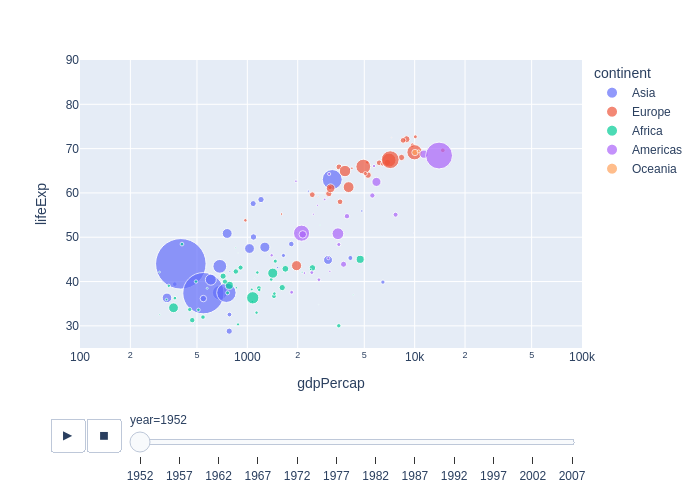

In [15]:
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country",
                 log_x=True, 
                 size_max=55, 
                 range_x=[100, 100000], 
                 range_y=[25, 90])

fig.show(renderer="png")

# Question 8

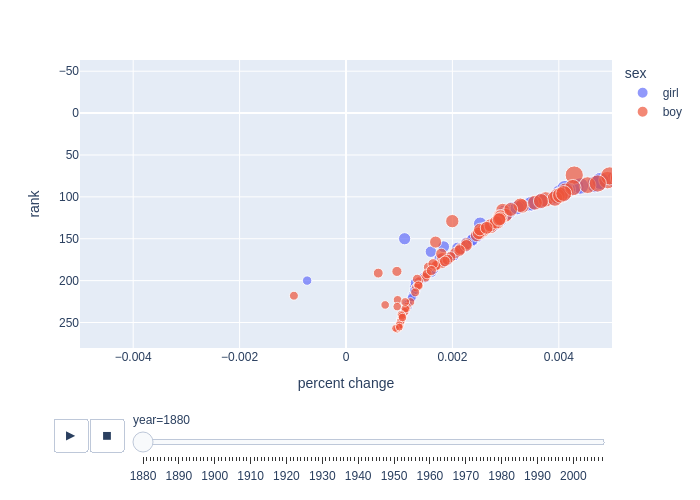

In [22]:
import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

bn['name'] = bn['name'] + " " + bn['sex'] 

bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

bn = bn.sort_values(['name', 'year'])

bn['percent change'] = bn['percent'].diff()

new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percentage change'] = bn.loc[new_name, 'percent'] 

bn = bn.sort_values('year')

bn = bn[bn.percent > 0.001]

fig = px.scatter(
    bn, 
    x='percent change',  
    y='rank',  
    animation_frame='year', 
    animation_group='name',  
    size='percent', 
    color='sex',  
    hover_name='name',  
    size_max=50,  
    range_x=[-0.005, 0.005]  
)

fig.update_yaxes(autorange='reversed')

fig.show(renderer="png")

# Question 9

In [ ]:
# Yes